In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [4]:
annot_f <- '/oak/stanford/groups/mrivas/ukbb24983/exome/annotation/20201025_exome_oqfe_2020/ukb24983_exomeOQFE.annotation.20201217.compact.tsv.gz'


In [5]:
pvcf_info_f <- '/oak/stanford/groups/mrivas/ukbb24983/exome/qc/oqfe_2020/intermediate_files/ukb23156_pvcf_info.tsv.gz'


In [6]:
pvcf_info_f %>%
fread(colClasses = c('#CHROM'='character')) %>%
rename('CHROM'='#CHROM') -> pvcf_info_df 


In [8]:
pvcf_info_df %>% count(FILTER)

FILTER,n
<chr>,<int>
.,15807976
MONOALLELIC,114728


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



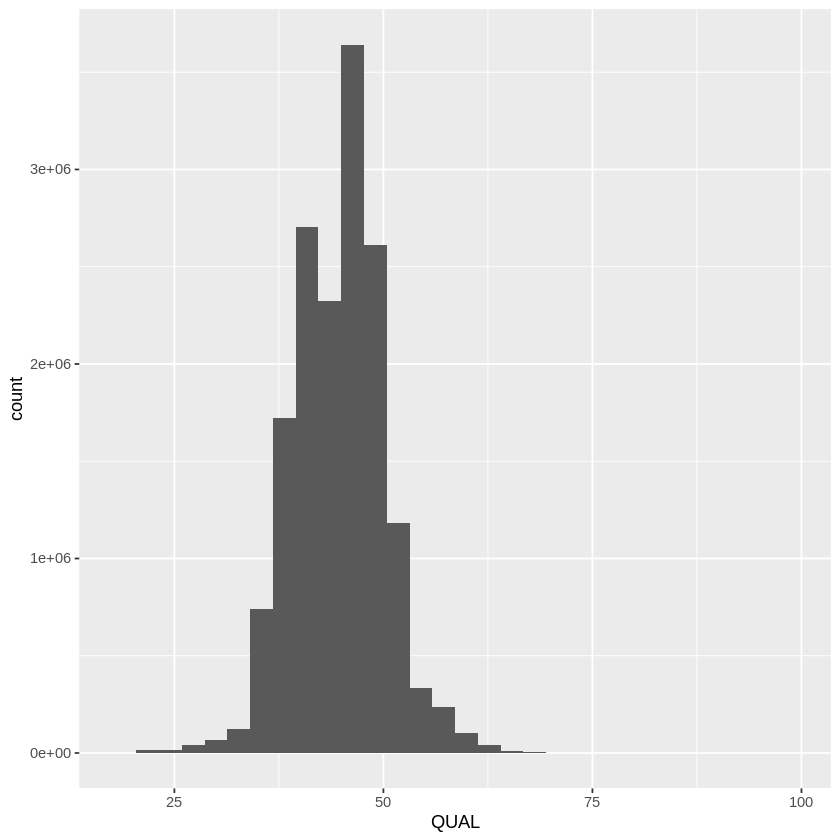

In [10]:
pvcf_info_df %>%
ggplot(aes(x = QUAL)) +
geom_histogram()

In [50]:
min(pvcf_info_df$QUAL)

[1] 20

In [12]:
pvcf_info_df %>%
ggplot(aes(x = QUAL)) +
geom_histogram(bins=30) +
theme_bw() +
labs(
    title = 'the quality (QUAL) score distribution in exome 200k pVCF file',
    x = 'QUAL score',
    y = 'The number of variants'
) -> p


In [13]:
ggsave('pvcf.qual.distribution.png', p)


Saving 6.67 x 6.67 in image



In [53]:
pvcf_info_df %>% select(pvcf_ID, FILTER) %>% filter(FILTER != '.') %>%
mutate(pvcf_ID = str_replace_all(pvcf_ID, '_', ':')) %>%
separate(pvcf_ID, paste0('ID', 1:10), remove=T, fill='right', sep=';')  %>%
gather(IDidx, ID, -FILTER) %>%
drop_na(ID) %>% select(FILTER	ID) -> pvcf_INFO_long_df


In [54]:
dim(pvcf_info_df)
dim(pvcf_INFO_long_df)

[1] 15922704        7

[1] 114728      2